## Visualized data

/var/folders/p1/4t2ts09s1pg1p6xt550h6jp80000gn/T/ipykernel_36205/2705818950.py:5: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('final_data.csv')


Cancellation Rate and Flight Count by Airline:
                cancellation_rate  num_flights
airline_type_1                                
KS                       0.162037          648
EM                       0.049500         5596
AX                       0.031491        42933
EV                       0.030314        89892
ZW                       0.026603        92884
C5                       0.023998        71632
PT                       0.023855       118299
YV                       0.018753       201892
MQ                       0.018583       313290
QX                       0.018342       121196
OH                       0.017095       276507
OO                       0.015407       862701
G7                       0.015162        74001
VX                       0.014758         5692
AS                       0.014034       245185
G4                       0.013700       111534
YX                       0.013057       345104
B6                       0.013034       291615
WN           

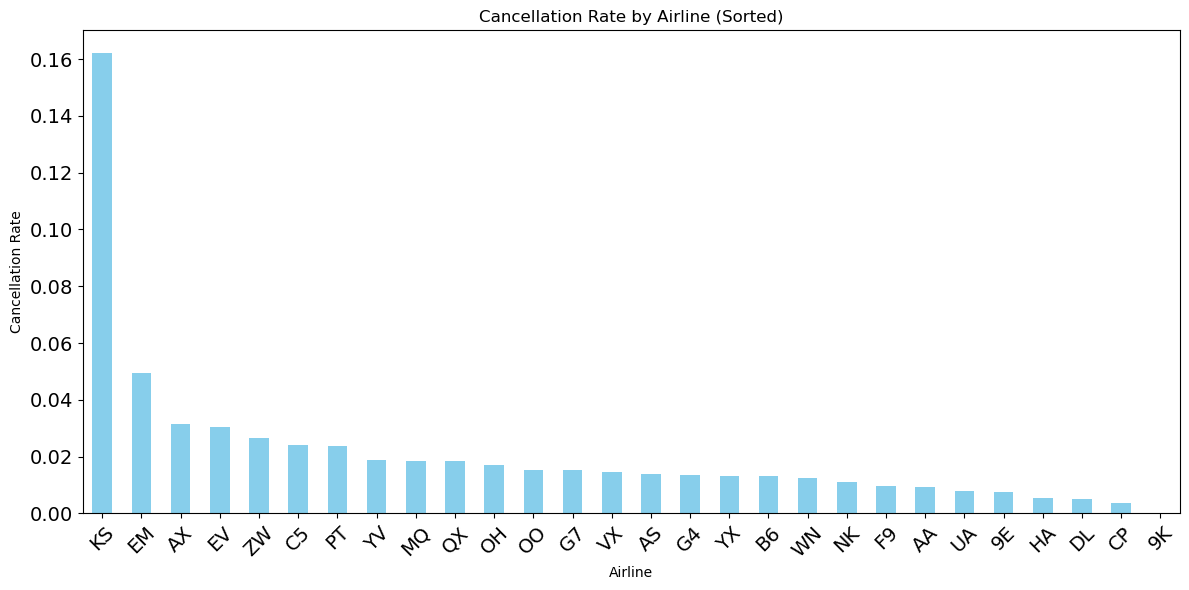

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('final_data.csv')

# Define the mapping from encoded airline type to original airline type
airline_mapping = {
    0: '9E', 1: '9K', 2: 'AA', 3: 'AS', 4: 'AX', 5: 'B6', 6: 'C5', 7: 'CP', 8: 'DL',
    9: 'EM', 10: 'EV', 11: 'F9', 12: 'G4', 13: 'G7', 14: 'HA', 15: 'KS', 16: 'MQ',
    17: 'NK', 18: 'OH', 19: 'OO', 20: 'PT', 21: 'QX', 22: 'UA', 23: 'VX', 24: 'WN',
    25: 'YV', 26: 'YX', 27: 'ZW'
}

data['airline_type_1'] = data['airline_type'].map(airline_mapping)

data['is_canceled'] = data['Cancelled']  

# Group by airline code (airline_type) and calculate mean cancellation rate and count of flights
airline_stats = data.groupby('airline_type_1')['is_canceled'].agg(['mean', 'count'])
airline_stats = airline_stats.rename(columns={'mean': 'cancellation_rate', 'count': 'num_flights'})

# Sort by cancellation rate in descending order
airline_stats_sorted = airline_stats.sort_values(by='cancellation_rate', ascending=False)
print("Cancellation Rate and Flight Count by Airline:")
print(airline_stats_sorted)

# Plot the sorted results
plt.figure(figsize=(12, 6))
airline_stats_sorted['cancellation_rate'].plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Airline (Sorted)')
plt.xlabel('Airline')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14) 


plt.tight_layout()

plt.savefig('cancellation_rate_by_airline.png', format='png', dpi=300)  # You can change format and dpi as needed

# Display the plot
plt.show()


In [2]:
print("Features in the data:")
print(list(data.columns))
num_features = data.shape[1]
print(f"The number of features in the dataset is: {num_features}")

Features in the data:
['airline_type', 'FlightDuration_Minutes', 'DepAirport', 'ArrAirport', 'DayOfWeek', 'CRSTimeOfDay_Dep', 'CRSTimeOfDay_Arr', 'Month', 'CRSDepTime_Origin_skycond', 'CRSArrTime_Dest_skycond', 'CRSDepTime_Origin_HourlyRelativeHumidity', 'CRSArrTime_Dest_HourlyRelativeHumidity', 'CRSDepTime_Origin_HourlyDryBulbTemperature', 'CRSArrTime_Dest_HourlyDryBulbTemperature', 'CRSDepTime_Origin_HourlyWindSpeed', 'CRSArrTime_Dest_HourlyWindSpeed', 'CRSDepTime_Origin_HourlyVisibility', 'CRSArrTime_Dest_HourlyVisibility', 'Cancelled', 'ArrDelay', 'airline_type_1', 'is_canceled']
The number of features in the dataset is: 22


In [3]:
import pandas as pd

# Add a binary column for cancellation (1 if canceled, 0 otherwise)
data['is_canceled'] = data['Cancelled'].astype(int)

# Count the total number of flights for each flight type
total_flights_per_type = data['airline_type'].value_counts()

# Count the number of cancellations for each flight type
cancellations_per_type = data.groupby('airline_type')['is_canceled'].sum()

# Combine both results into a single DataFrame for easier comparison
flight_type_summary = pd.DataFrame({
    'Total_Flights': total_flights_per_type,
    'Cancellations': cancellations_per_type
}).fillna(0)  # fillna(0) in case there are flight types with no cancellations

# Print the results
print("Flight Type Summary:")
print(flight_type_summary)


Flight Type Summary:
              Total_Flights  Cancellations
airline_type                              
0                    283434           2116
1                       335              0
2                    965700           9022
3                    245185           3441
4                     42933           1352
5                    291615           3801
6                     71632           1719
7                     47551            168
8                    997905           5221
9                      5596            277
10                    89892           2725
11                   157920           1519
12                   111534           1528
13                    74001           1122
14                    80995            440
15                      648            105
16                   313290           5822
17                   238697           2637
18                   276507           4727
19                   862701          13292
20                   118299      

In [4]:
import pandas as pd


data['is_canceled'] = data['Cancelled'].astype(int)

# Calculate the cancellation rate and count of flights for each departure airport (Origin)
departure_stats = data.groupby('DepAirport')['is_canceled'].agg(['mean', 'count'])
departure_stats = departure_stats.rename(columns={'mean': 'cancellation_rate', 'count': 'num_flights'})

# Calculate the cancellation rate and count of flights for each arrival airport (Dest)
arrival_stats = data.groupby('ArrAirport')['is_canceled'].agg(['mean', 'count'])
arrival_stats = arrival_stats.rename(columns={'mean': 'cancellation_rate', 'count': 'num_flights'})

# Sort by cancellation rate and select the top 10 for both departure and arrival airports
top_10_departure = departure_stats.sort_values(by='cancellation_rate', ascending=False).head(10)
top_10_arrival = arrival_stats.sort_values(by='cancellation_rate', ascending=False).head(10)

# Display the results with cancellation rate and number of flights
print("Top 10 Departure Airports by Cancellation Rate:")
print(top_10_departure)

print("\nTop 10 Arrival Airports by Cancellation Rate:")
print(top_10_arrival)


Top 10 Departure Airports by Cancellation Rate:
            cancellation_rate  num_flights
DepAirport                                
65                   0.191489           47
109                  0.175385          325
354                  0.172297         1480
191                  0.158949          799
103                  0.153061          196
243                  0.128668          443
182                  0.100244          409
372                  0.097990          398
266                  0.097264          329
22                   0.085566         8473

Top 10 Arrival Airports by Cancellation Rate:
            cancellation_rate  num_flights
ArrAirport                                
109                  0.148607          323
191                  0.138404          802
103                  0.128866          194
243                  0.115124          443
9                    0.084906          106
372                  0.081683          404
182                  0.077859          411
10

Cancellation Rate by Day of the Week:
DayOfWeek
1    0.014245
3    0.013885
4    0.013134
2    0.012811
7    0.011447
5    0.010773
6    0.009230
Name: is_canceled, dtype: float64


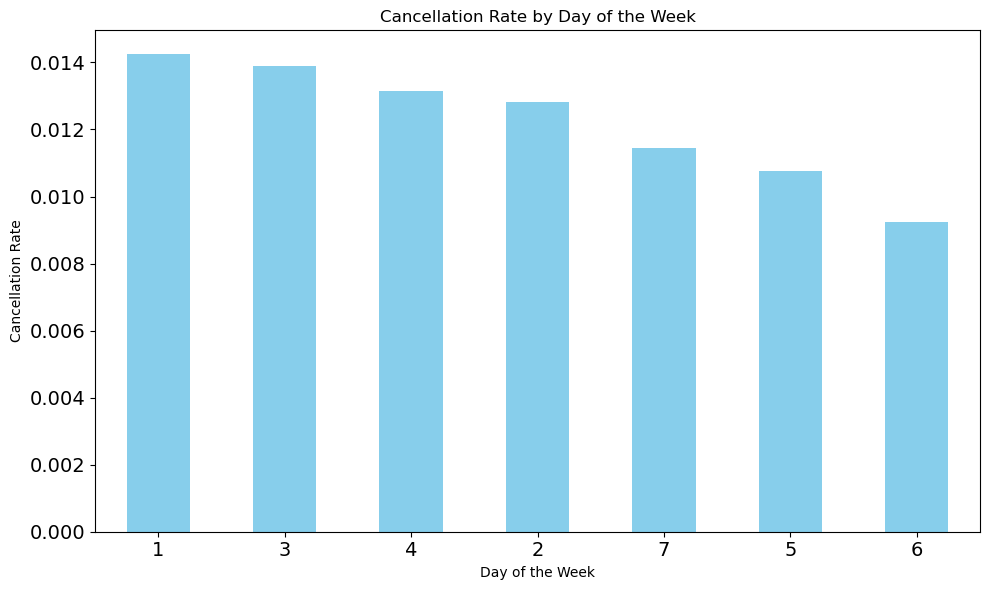

In [5]:
import pandas as pd


# Group by 'DayOfWeek' and calculate the cancellation rate
cancellation_rate_by_day = data.groupby('DayOfWeek')['is_canceled'].mean()

# Sort the days by cancellation rate in descending order
cancellation_rate_by_day = cancellation_rate_by_day.sort_values(ascending=False)

# Display the results
print("Cancellation Rate by Day of the Week:")
print(cancellation_rate_by_day)

import matplotlib.pyplot as plt

# Plot the cancellation rate by day of the week
plt.figure(figsize=(10, 6))
cancellation_rate_by_day.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('cancellation_rate_by_DayofWeek.png', format='png', dpi=300)  # You can change format and dpi as needed

plt.show()


## T-Test for continuous variables

In [6]:
import pandas as pd
from scipy import stats

data['Cancelled'] = pd.to_numeric(data['Cancelled'], errors='coerce')

numerical_features = ['FlightDuration_Minutes', 
                      'CRSDepTime_Origin_HourlyRelativeHumidity', 'CRSArrTime_Dest_HourlyRelativeHumidity',
                      'CRSDepTime_Origin_HourlyDryBulbTemperature', 'CRSArrTime_Dest_HourlyDryBulbTemperature', 
                      'CRSDepTime_Origin_HourlyWindSpeed', 'CRSArrTime_Dest_HourlyWindSpeed', 
                      'CRSDepTime_Origin_HourlyVisibility', 'CRSArrTime_Dest_HourlyVisibility']

# Initialize a dictionary to store t-test results
t_test_results = {}

for feature in numerical_features:
    # Convert feature to numeric, coercing errors to NaN
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    
    canceled = data[data['Cancelled'] == 1][feature].dropna()
    not_canceled = data[data['Cancelled'] == 0][feature].dropna()
    
    # Perform the t-test if there is data in both groups
    if not canceled.empty and not not_canceled.empty:
        t_stat, p_value = stats.ttest_ind(canceled, not_canceled, equal_var=False)  # Welch's t-test
        t_test_results[feature] = {'t_statistic': t_stat, 'p_value': p_value}
    else:
        t_test_results[feature] = {'t_statistic': None, 'p_value': None}

# Convert results to a DataFrame for easy viewing
t_test_df = pd.DataFrame(t_test_results).T

# Sort the DataFrame by p_value in ascending order
t_test_df = t_test_df.sort_values(by='p_value', ascending=True)

print(t_test_df)




                                            t_statistic        p_value
FlightDuration_Minutes                       -63.537208   0.000000e+00
CRSArrTime_Dest_HourlyRelativeHumidity       122.255223   0.000000e+00
CRSDepTime_Origin_HourlyDryBulbTemperature  -147.331498   0.000000e+00
CRSArrTime_Dest_HourlyDryBulbTemperature    -151.254088   0.000000e+00
CRSDepTime_Origin_HourlyWindSpeed            109.566769   0.000000e+00
CRSArrTime_Dest_HourlyWindSpeed              110.529758   0.000000e+00
CRSDepTime_Origin_HourlyVisibility          -126.615718   0.000000e+00
CRSArrTime_Dest_HourlyVisibility            -120.679212   0.000000e+00
CRSDepTime_Origin_HourlyRelativeHumidity      34.696275  9.506824e-264


## Chi-Squared Test for categories variables

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency


# Load the data (assuming it's already loaded as `data`)
data['is_canceled'] = data['Cancelled'].astype(int)

# Define the list of categorical features you want to test
categorical_features = ['airline_type', 'FlightDuration_Minutes',
                        'DepAirport', 'ArrAirport', 'DayOfWeek', 'CRSTimeOfDay_Dep',
                        'CRSTimeOfDay_Arr', 'Month', 'CRSDepTime_Origin_skycond', 'CRSArrTime_Dest_skycond']

# Initialize a dictionary to store chi-squared test results
chi2_test_results = {}

for feature in categorical_features:
    if feature in data.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(data[feature], data['is_canceled'])
        
        # Perform the chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Store the test results
        chi2_test_results[feature] = {'chi2_statistic': chi2, 'p_value': p}
    else:
        print(f"Feature '{feature}' not found in the data. Skipping this feature.")

# Convert results to a DataFrame for easy viewing
chi2_test_df = pd.DataFrame(chi2_test_results).T

# Sort the DataFrame by p_value in ascending order to see most significant features first
chi2_test_df = chi2_test_df.sort_values(by='p_value', ascending=True)

print(chi2_test_df)


                           chi2_statistic        p_value
airline_type                 19856.540352   0.000000e+00
FlightDuration_Minutes        5306.103494   0.000000e+00
DepAirport                   30000.033667   0.000000e+00
ArrAirport                   21700.959691   0.000000e+00
DayOfWeek                     1813.344967   0.000000e+00
Month                        19958.751809   0.000000e+00
CRSDepTime_Origin_skycond    19640.494128   0.000000e+00
CRSArrTime_Dest_skycond      17742.155352   0.000000e+00
CRSTimeOfDay_Dep               561.559906  3.226457e-120
CRSTimeOfDay_Arr               370.442720   6.751726e-79


## Logistic Regression

In [8]:
crs_columns = ['airline_type', 'FlightDuration_Minutes', 'DepAirport', 'ArrAirport', 'DayOfWeek',
               'CRSTimeOfDay_Dep', 'CRSTimeOfDay_Arr', 'CRSDepTime_Origin_skycond',
               'CRSArrTime_Dest_skycond', 'CRSDepTime_Origin_HourlyRelativeHumidity',
               'CRSArrTime_Dest_HourlyRelativeHumidity', 'CRSDepTime_Origin_HourlyDryBulbTemperature',
               'CRSArrTime_Dest_HourlyDryBulbTemperature', 'CRSDepTime_Origin_HourlyWindSpeed',
               'CRSArrTime_Dest_HourlyWindSpeed', 'CRSDepTime_Origin_HourlyVisibility', 
               'CRSArrTime_Dest_HourlyVisibility']
X = data[crs_columns]
y = data['Cancelled']        
float_columns = ['CRSDepTime_Origin_HourlyRelativeHumidity',
               'CRSArrTime_Dest_HourlyRelativeHumidity', 'CRSDepTime_Origin_HourlyDryBulbTemperature',
               'CRSArrTime_Dest_HourlyDryBulbTemperature', 'CRSDepTime_Origin_HourlyWindSpeed',
               'CRSArrTime_Dest_HourlyWindSpeed', 'CRSDepTime_Origin_HourlyVisibility', 
               'CRSArrTime_Dest_HourlyVisibility']

for col in float_columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
print(X.shape)
print(X.info())

(8148832, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148832 entries, 0 to 8148831
Data columns (total 17 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   airline_type                                int64  
 1   FlightDuration_Minutes                      float64
 2   DepAirport                                  int64  
 3   ArrAirport                                  int64  
 4   DayOfWeek                                   int64  
 5   CRSTimeOfDay_Dep                            int64  
 6   CRSTimeOfDay_Arr                            int64  
 7   CRSDepTime_Origin_skycond                   float64
 8   CRSArrTime_Dest_skycond                     float64
 9   CRSDepTime_Origin_HourlyRelativeHumidity    float64
 10  CRSArrTime_Dest_HourlyRelativeHumidity      float64
 11  CRSDepTime_Origin_HourlyDryBulbTemperature  float64
 12  CRSArrTime_Dest_HourlyDryBulbTemperature    float64
 13  CRSDepTime_Or

/var/folders/p1/4t2ts09s1pg1p6xt550h6jp80000gn/T/ipykernel_36205/2733158716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')


In [9]:
X=X.dropna()
print(X.info)
y = y.loc[X.index].reset_index(drop=True)
X = X.reset_index(drop=True)

<bound method DataFrame.info of          airline_type  FlightDuration_Minutes  DepAirport  ArrAirport  \
0                  10                   143.0         124          71   
1                  10                   143.0         124          71   
2                  10                   143.0         124          71   
3                  10                   143.0         124          71   
4                  10                   143.0         124          71   
...               ...                     ...         ...         ...   
8148827            19                    79.0         278         332   
8148828            19                   107.0         366         202   
8148829            19                    84.0         247         202   
8148830            19                    99.0         344         330   
8148831            19                   102.0         140         100   

         DayOfWeek  CRSTimeOfDay_Dep  CRSTimeOfDay_Arr  \
0                7               

/Users/zhenkepeng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9877
Confusion Matrix:
[[2414390     146]
 [  30014     100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   2414536
           1       0.41      0.00      0.01     30114

    accuracy                           0.99   2444650
   macro avg       0.70      0.50      0.50   2444650
weighted avg       0.98      0.99      0.98   2444650

AUC: 0.7409


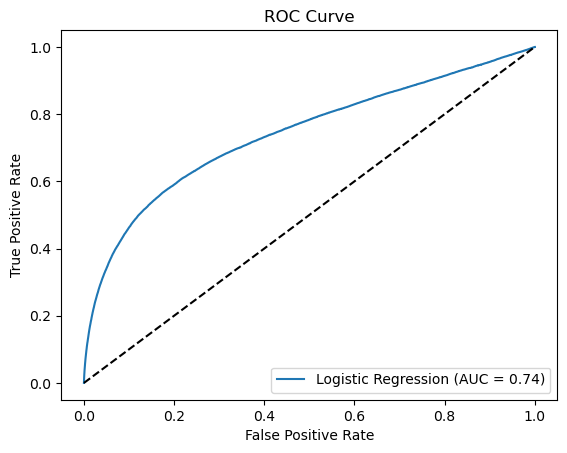

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


continuous_vars = [
    'FlightDuration_Minutes', 
    'CRSDepTime_Origin_HourlyRelativeHumidity', 
    'CRSArrTime_Dest_HourlyRelativeHumidity', 
    'CRSDepTime_Origin_HourlyDryBulbTemperature', 
    'CRSArrTime_Dest_HourlyDryBulbTemperature', 
    'CRSDepTime_Origin_HourlyWindSpeed', 
    'CRSArrTime_Dest_HourlyWindSpeed', 
    'CRSDepTime_Origin_HourlyVisibility', 
    'CRSArrTime_Dest_HourlyVisibility'
]

categorical_vars = [
    'airline_type', 
    'DepAirport', 
    'ArrAirport', 
    'DayOfWeek', 
    'CRSTimeOfDay_Dep', 
    'CRSTimeOfDay_Arr', 
    'Month', 
    'CRSDepTime_Origin_skycond', 
    'CRSArrTime_Dest_skycond'
]

X_continuous = data[continuous_vars]
X_categorical = data[categorical_vars]

# Impute missing values for continuous variables with median
imputer_cont = SimpleImputer(strategy='median')
X_continuous_imputed = pd.DataFrame(imputer_cont.fit_transform(X_continuous), columns=X_continuous.columns)

# Impute missing values for categorical variables with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = pd.DataFrame(imputer_cat.fit_transform(X_categorical), columns=X_categorical.columns)

# One-hot encode categorical variables
X_categorical_encoded = pd.get_dummies(X_categorical_imputed, drop_first=True)

# Combine continuous and encoded categorical features
X = pd.concat([X_continuous_imputed, X_categorical_encoded], axis=1)

# Define your target variable 'y'
y = data['is_canceled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=50, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {roc_auc:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC-Curve.png', format='png', dpi=300)
plt.show()

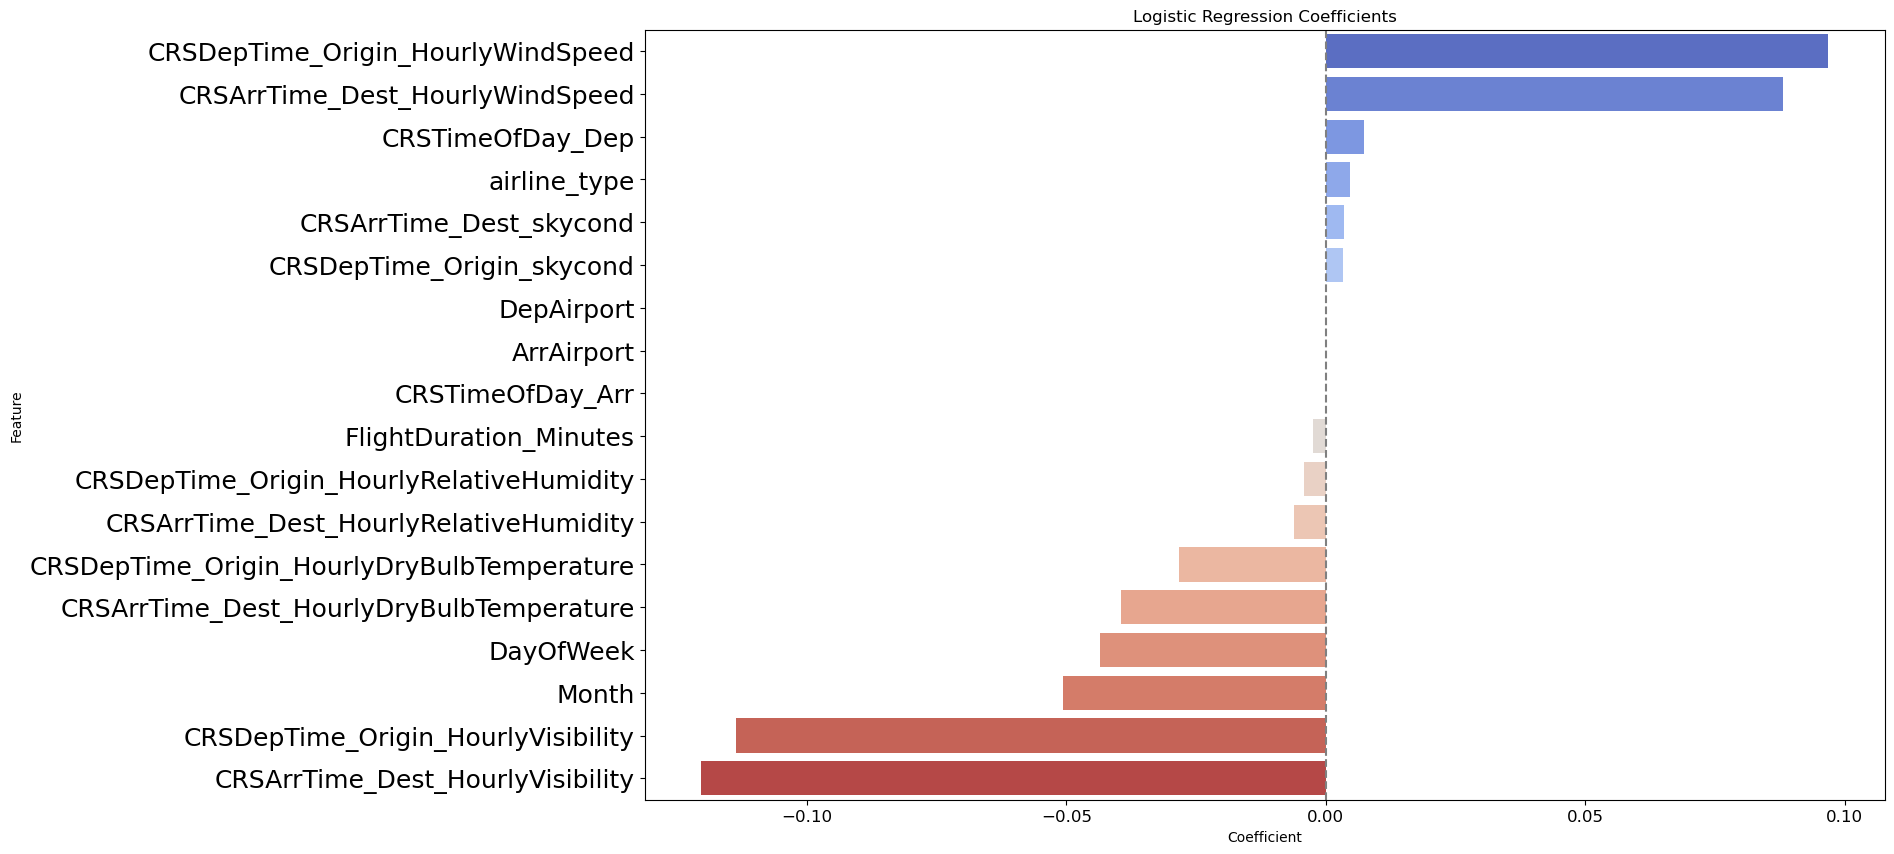

In [19]:
import seaborn as sns

coefficients = log_reg.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

plt.figure(figsize=(16, 10))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.sort_values(by='Coefficient', ascending=False), palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=18)

plt.axvline(0, color='grey', linestyle='--')  
plt.savefig('LogisticRegressionCoef.png', format='png', dpi=300)  

plt.show()

In [12]:
print(coef_df)

                                       Feature  Coefficient
0                       FlightDuration_Minutes    -0.002537
1     CRSDepTime_Origin_HourlyRelativeHumidity    -0.004225
2       CRSArrTime_Dest_HourlyRelativeHumidity    -0.006212
3   CRSDepTime_Origin_HourlyDryBulbTemperature    -0.028379
4     CRSArrTime_Dest_HourlyDryBulbTemperature    -0.039523
5            CRSDepTime_Origin_HourlyWindSpeed     0.096800
6              CRSArrTime_Dest_HourlyWindSpeed     0.088057
7           CRSDepTime_Origin_HourlyVisibility    -0.113717
8             CRSArrTime_Dest_HourlyVisibility    -0.120453
9                                 airline_type     0.004581
10                                  DepAirport     0.000086
11                                  ArrAirport     0.000083
12                                   DayOfWeek    -0.043623
13                            CRSTimeOfDay_Dep     0.007308
14                            CRSTimeOfDay_Arr     0.000053
15                                      

/Users/zhenkepeng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7329
Confusion Matrix:
[[1771391  643145]
 [   9928   20186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84   2414536
           1       0.03      0.67      0.06     30114

    accuracy                           0.73   2444650
   macro avg       0.51      0.70      0.45   2444650
weighted avg       0.98      0.73      0.83   2444650

AUC: 0.7624


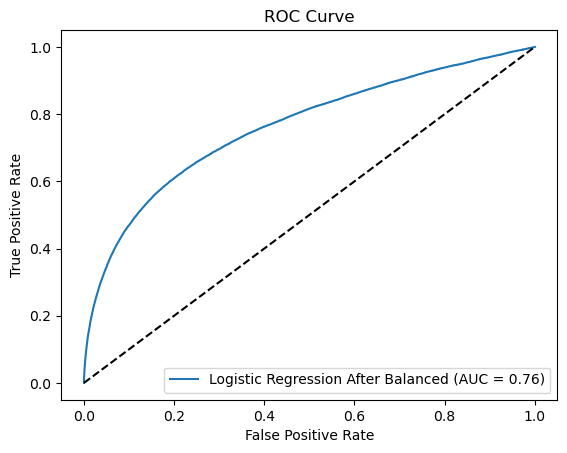

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_balanced = LogisticRegression(max_iter=50, random_state=42, class_weight='balanced')

log_reg_balanced.fit(X_train, y_train)


y_pred = log_reg_balanced.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob = log_reg_balanced.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression After Balanced (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC-Curve_balanced.png', format='png', dpi=300)  

plt.show()

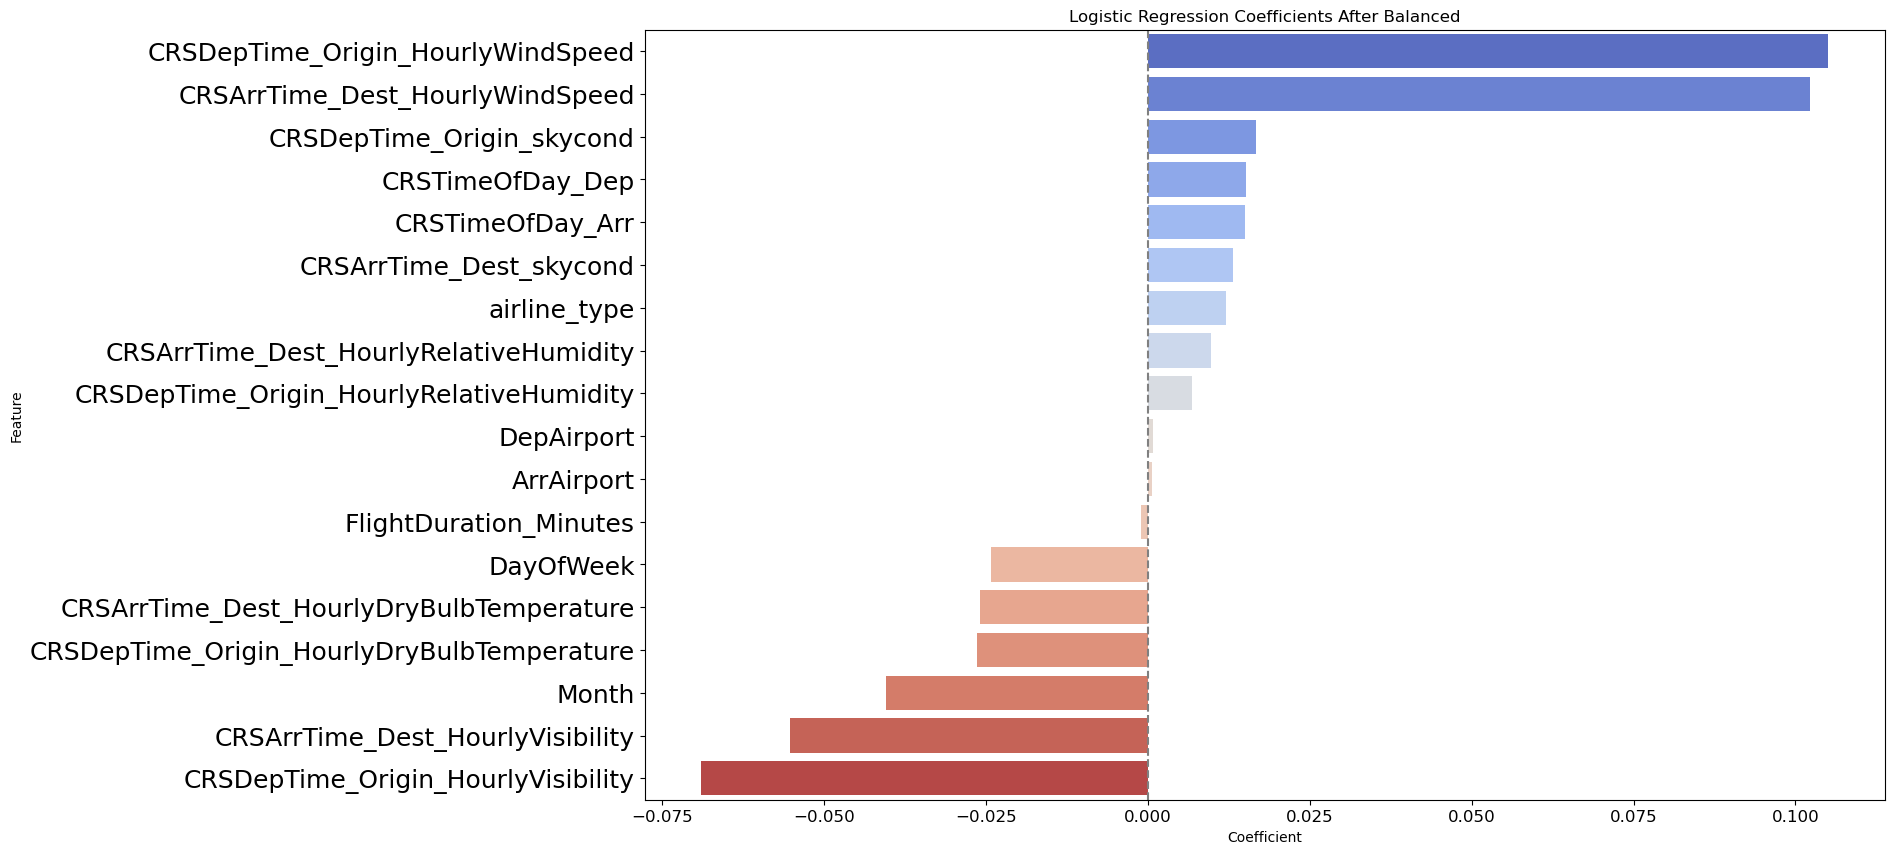

In [22]:
coefficients = log_reg_balanced.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

plt.figure(figsize=(16, 10))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.sort_values(by='Coefficient', ascending=False), palette='coolwarm')
plt.title('Logistic Regression Coefficients After Balanced')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=18)
plt.axvline(0, color='grey', linestyle='--')  
plt.savefig('LogisticRegressionCoef_Balanced.png', format='png', dpi=300) 
plt.show()

In [15]:
print(coef_df)

                                       Feature  Coefficient
0                       FlightDuration_Minutes    -0.001065
1     CRSDepTime_Origin_HourlyRelativeHumidity     0.006873
2       CRSArrTime_Dest_HourlyRelativeHumidity     0.009682
3   CRSDepTime_Origin_HourlyDryBulbTemperature    -0.026372
4     CRSArrTime_Dest_HourlyDryBulbTemperature    -0.025888
5            CRSDepTime_Origin_HourlyWindSpeed     0.105048
6              CRSArrTime_Dest_HourlyWindSpeed     0.102312
7           CRSDepTime_Origin_HourlyVisibility    -0.069026
8             CRSArrTime_Dest_HourlyVisibility    -0.055235
9                                 airline_type     0.012101
10                                  DepAirport     0.000810
11                                  ArrAirport     0.000649
12                                   DayOfWeek    -0.024303
13                            CRSTimeOfDay_Dep     0.015121
14                            CRSTimeOfDay_Arr     0.014937
15                                      